# DATA PREPARATION

The preparation implied by this notebook is better explained (and is derived from) in Data_preparation-fast_run_saterday_31_March 

In [1]:
%matplotlib inline

In [2]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2018-07-20 14:24:25.527144


In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np

In [5]:
store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/edp_2016_final.h5'
reaction_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/reaction.h5'
result_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/result.h5'
dads_by_year_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/dads_by_year.h5'
pickles_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/pickles/'
Store = pd.HDFStore(result_store_path); Store.close()

In [6]:
df = pd.read_hdf(result_store_path, "merge_2011_2014")

In [ ]:
df.head()

In [10]:
%%time
merge =df

Wall time: 0 ns


In [11]:
merge.shape

(809819, 511)

In [25]:
merge.ANAIS_pere_2011>2000

0          True
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9          True
10         True
11         True
12         True
13        False
14        False
15        False
16        False
17         True
18        False
19        False
20        False
21        False
22         True
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
809789    False
809790    False
809791    False
809792    False
809793    False
809794    False
809795    False
809796    False
809797    False
809798    False
809799    False
809800     True
809801    False
809802    False
809803    False
809804    False
809805    False
809806    False
809807    False
809808    False
809809    False
809810    False
809811     True
809812    False
809813     True
809814    False
809815    False
809816     True
809817     True
809818     True
Name: ANAIS_pere_2011, L

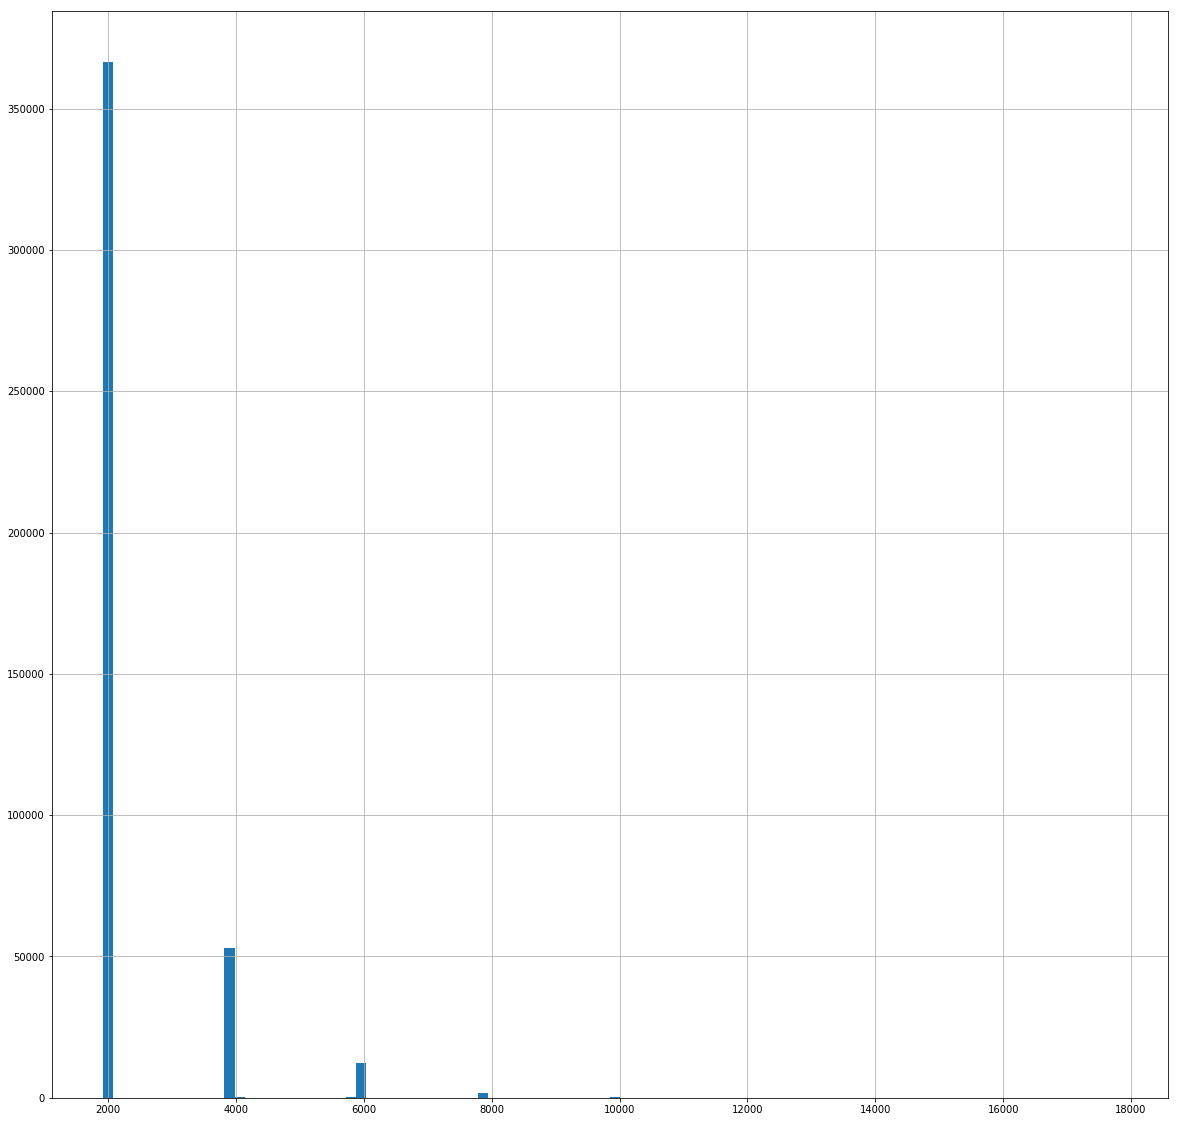

In [23]:
plt.figure(figsize=(20,20))
merge[(merge.Age_mere_2011 - merge.Age_mere_2014)==-3].ANAIS_pere_2011.hist(bins = 100)

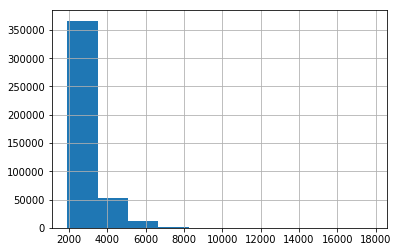

In [22]:
merge[(merge.Age_mere_2011 - merge.Age_mere_2014)==-3].ANAIS_pere_2011.hist(bins = )

In [15]:
(merge.Age_mere_2011 - merge.Age_mere_2014).value_counts()

-3.0      517073
-6.0       43252
-24.0       7786
-23.0       7467
-25.0       6783
 19.0       4694
 18.0       4586
 20.0       4349
 21.0       4172
 17.0       4065
-9.0        4023
 22.0       3350
-26.0       3066
-27.0       2721
 23.0       2619
-28.0       2305
 24.0       1923
 25.0       1632
-29.0       1437
 26.0       1245
-30.0       1220
 16.0       1142
 27.0       1119
-2.0        1062
-31.0       1020
-1.0         891
 28.0        889
-32.0        859
 29.0        828
-4.0         815
           ...  
Length: 368, dtype: int64

In [ ]:
same_age_wo = (merge.Age_wo_2011 - merge.Age_wo_2014) == 0
same_age_me = (merge.Age_men_x - merge.Age_men_y) == 0

In [19]:
(same_age_wo&same_age_me
).value_counts(normalize = True)

False    0.999967
True     0.000033
dtype: float64

Attention on a des NA qui sont présent dans la base fisc_revdet alors qu'on devrait avoir des zéros, je vire les observations. 

Vérifier que c'est ok potentiel TODO: en lien avec TODO suivant

### Merge avec fiscr

In [23]:
fiscr_2011 = load_fisc_r_by_year(2011)

In [24]:
columns_to_drop_for_merge = []
# ['REG','DEP','DEPCOM','TU10', # A rajouter après pour avoir des effets fixes
#                             'OCCTYP','I_PAUVRE50M','I_PAUVRE60M',
#                            'MINIM', 'M_RSAM','M_RSA_ACTM','LOGTM',
                             
#                             ]

In [25]:
df_fiscr_2011 = load_fisc_r_by_year(year = 2011)
df_fiscr_2014 = load_fisc_r_by_year(year = 2014)
#df_fiscr_2011 = df_fiscr_2011.sample(n=400000, replace =False,  random_state = 42 )


In [26]:
df_fiscr_2011.ID_FISC_LOG_DIFF.value_counts().value_counts()

1    2380185
dtype: int64

In [27]:
couple_one_fisc_foy = (df_fiscr_2011.NBFOYM==1) &(df_fiscr_2011.NBPERSM>=2)
df_fiscr_2011_select =  df_fiscr_2011[couple_one_fisc_foy]

In [28]:
selected_log_id = df_fiscr_2011.ID_FISC_LOG_DIFF

In [ ]:
load_df_fiscrevdet_by_year(2011).head()

On réaliste un merge de la table:  
1) fisci contenant des infos individuelles (essentiellement TYPEFISC, et CIDECI) . Clé ID_FISC_FOY_DIFF, ID_FISC_LOG_DIFF  
2) fiscr_rev_det contenant des infos individuelles sur le revenu (et rien d'autre).  Clé ID_FISC_FOY_DIFF  
3) fiscr contenant des informations au niveau du logement fiscal.   Clé  ID_FISC_LOG_DIFF  


In [30]:
%%time
fiscr_fisci_fiscrevdet_dict= dict()
for year in [2011,2014]:
    fisc_r = load_fisc_r_by_year(year)
    fisc_r.drop(columns_to_drop_for_merge, axis = 1, inplace=True)
    
    df_fisci = load_fisc_i_by_year(year)
    fisci = df_fisci[df_fisci.ID_FISC_LOG_DIFF.isin(selected_log_id)]
    del df_fisci
    df_fiscrevdet = load_df_fiscrevdet_by_year(year)
    df_fiscrevdet['TYPE_FISC'] = df_fiscrevdet.TYPE_FISC.astype('str')
    merge = pd.merge(fisci, df_fiscrevdet, on=[
            'ID_FISC_FOY_DIFF','ORDREFIP', 'TYPE_FISC'])
    del df_fiscrevdet
    merge = pd.merge(merge, fisc_r, on='ID_FISC_LOG_DIFF', how='right')
    fiscr_fisci_fiscrevdet_dict[year]=merge

Wall time: 2min 34s


On obtient donc une table contenant les données individuelles avec le salaire (fisci+fiscrevdet), combiné avec les données agrégées au niveau du logement (fiscr).
Les données fisc_r sont donc redondantes pour chaque individu.

In [31]:
#fiscr_fisci_fiscrevdet_dict[2011].sort("ID_FISC_FOY_DIFF")

In [32]:
fiscr_fisci_fiscrevdet_dict[2011].ORDREFIP.isnull().value_counts()

False    5016790
dtype: int64

In [33]:
fiscr_fisci_fiscrevdet_dict[2011] = fiscr_fisci_fiscrevdet_dict[2011][~fiscr_fisci_fiscrevdet_dict[2011].ORDREFIP.isnull()]

In [34]:
fiscr_fisci_fiscrevdet_dict[2014] = fiscr_fisci_fiscrevdet_dict[2014][~fiscr_fisci_fiscrevdet_dict[2014].ORDREFIP.isnull()]

In [35]:
df_2011 = fiscr_fisci_fiscrevdet_dict[2011]

In [36]:
df_2014 = fiscr_fisci_fiscrevdet_dict[2014]

In [37]:
del fiscr_fisci_fiscrevdet_dict

In [38]:
df_2014.shape

(3711395, 136)

In [39]:
print df_2014.ID_FISC_LOG_DIFF.nunique()
print df_2011.ID_FISC_LOG_DIFF.nunique()

1741312
2380185


In [40]:
%%time
id_set_2014 = set(df_2014.ID_FISC_FOY_DIFF)

Wall time: 517 ms


In [41]:
id_set_2011 = set(df_2011.ID_FISC_FOY_DIFF)

In [42]:
%%time
intersect = id_set_2011.intersection(id_set_2014)

Wall time: 3.25 s


In [43]:
len(intersect)

2097467

In [44]:
df_2014_keep = df_2014[df_2014.ID_FISC_FOY_DIFF.isin(intersect)] 

In [45]:
df_2011_keep = df_2011[df_2011.ID_FISC_FOY_DIFF.isin(intersect)] 

In [46]:
len(id_set_2011)

3261946

In [47]:
#df_2014.sort("ID_FISC_FOY_DIFF")

In [48]:
df_2014_keep = df_2014_keep[df_2014_keep.TYPE_FISC=='1']

In [49]:
df_2011_keep = df_2011_keep[df_2011_keep.TYPE_FISC=='1']

In [50]:
%%time
merge = pd.merge(df_2014_keep, df_2011_keep, how='inner',on = 'ID_FISC_FOY_DIFF', suffixes=('_2014',"_2011"))

Wall time: 16.5 s


In [51]:
merge.shape

(2124029, 271)

In [52]:
merge.ID_FISC_LOG_DIFF_2011.head()

0    2795772
1     175062
2    3129312
3    2245265
4    2245265
Name: ID_FISC_LOG_DIFF_2011, dtype: float64

In [ ]:
merge[["ZSALM_2014", "YSALI_2014", "ID_FISC_LOG_DIFF_2011", "ID_FISC_LOG_DIFF_2014"]].head()

In [54]:
(merge.ID_FISC_LOG_DIFF_2011 == merge.ID_FISC_LOG_DIFF_2014).value_counts()

True     2102096
False      21933
dtype: int64

In [55]:
merge["Rbg_2011"] =(( merge.ZTSAM_2011*0.9) + merge.ZRAGM_2011 + merge.ZRACM_2011 + merge.ZRNCM_2011 + merge.ZFONM_2011 + merge.ZPERM_2011*0.9
                    + merge.ZRICM_2011)
merge["Rbg_2014"] =(( merge.ZTSAM_2014*0.9) + merge.ZRAGM_2014 + merge.ZRACM_2014 + merge.ZRNCM_2014 + merge.ZFONM_2014 + merge.ZPERM_2014*0.9
                    + merge.ZRICM_2014)

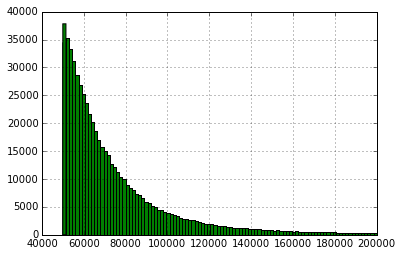

In [56]:
merge.Rbg_2011[((merge.Rbg_2011>50000)
                &(merge.Rbg_2011<200000))].hist(bins = 100)
merge.Rbg_2014[((merge.Rbg_2014>50000)
                &(merge.Rbg_2014<200000))].hist(bins = 100)

In [57]:
import seaborn as sns

In [58]:
merge.NBPAC_2011.head()

0    0
1    0
2    0
3    0
4    0
Name: NBPAC_2011, dtype: float64

In [59]:
merge.Rbg_2011.fillna(0, inplace = True)
merge.Rbg_2014.fillna(0, inplace = True)

In [60]:
#Ancienne version ou on selectionnait que les ménages qui apparetnait à l'ensemble 50000-20000
# df_high_earner = merge[((merge.Rbg_2011>50000)
#                       &(merge.Rbg_2011<200000)
#                       &(merge.Rbg_2014>20000)
#                       & (merge.Rbg_2014<300000))]

In [137]:
#Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
df_high_earner = merge[((
            (merge.Rbg_2011>50000)
            &(merge.Rbg_2011<200000)
        )|(
            (merge.Rbg_2014>50000)
            & (merge.Rbg_2014<200000)))]

(0, 300000)

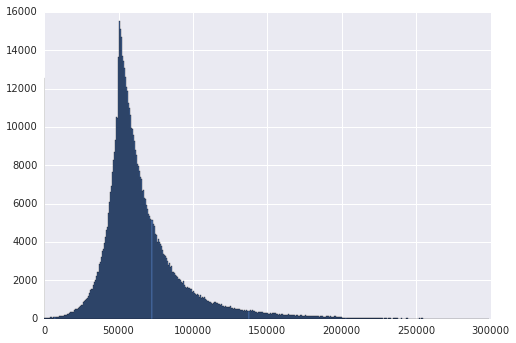

In [139]:
df_high_earner.query("Rbg_2011<300000").Rbg_2011.hist(bins = 1000)
plt.xlim(0,300000)

In [140]:

print (merge.Rbg_2014 - merge.Rbg_2011).mean()
print (df_high_earner.Rbg_2014 - df_high_earner.Rbg_2011).mean()

3434.08729217
6076.69485951


mean reversal or change in distribution ?

In [141]:
df_grpby_first = merge.groupby('ID_FISC_LOG_DIFF_2011').first()
df_high_grpby_first = df_high_earner.groupby('ID_FISC_LOG_DIFF_2011').first()

In [142]:
print (df_grpby_first.Rbg_2014 - df_grpby_first.Rbg_2011).mean()
print (df_high_grpby_first.Rbg_2014 - df_high_grpby_first.Rbg_2011).mean()

3133.21536349
5788.33638976


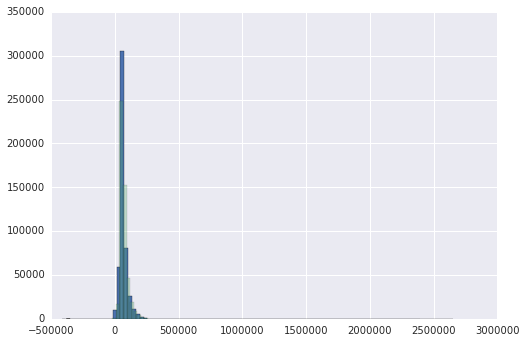

In [143]:
df_high_grpby_first.Rbg_2011.hist(bins = 100)
df_high_grpby_first.Rbg_2014.hist(bins = 100, alpha = 0.3)

In [144]:
print df_high_grpby_first.Rbg_2014.describe()
print df_high_grpby_first.Rbg_2011.describe()

count     501380.000000
mean       71888.518795
std        32554.879699
min      -412481.900000
25%        53740.800000
50%        62924.400000
75%        80431.200000
max      2392944.000000
Name: Rbg_2014, dtype: float64
count     501380.000000
mean       66100.182405
std        33581.952140
min      -380145.900000
25%        49988.225000
50%        58529.300000
75%        74756.625000
max      2651201.000000
Name: Rbg_2011, dtype: float64


In [145]:
print (df_high_grpby_first.NBPAC_2011>0).value_counts()
print (df_high_grpby_first.NBPAC_2011>0).value_counts(normalize = True)

True     326337
False    175043
dtype: int64
True     0.650878
False    0.349122
dtype: float64


In [146]:
same_pac_nb = (df_high_grpby_first.NBPAC_2011 == df_high_grpby_first.NBPAC_2014)
(df_high_grpby_first.NBPAC_2011 == df_high_grpby_first.NBPAC_2014).value_counts()

True     373694
False    127686
dtype: int64

In [147]:
df_high_grpby_first[same_pac_nb].NBFOYM_2011.value_counts()

1    249902
2     92418
3     24747
4      5239
5      1054
6       235
7        62
8        25
9        12
dtype: int64

In [148]:
one_tax_unit = (df_high_grpby_first.NBFOYM_2011 == 1)

In [149]:
df_high_grpby_first.NBPERSM_2011.head()

ID_FISC_LOG_DIFF_2011
Name: NBPERSM_2011, dtype: float64

In [ ]:
df_high_grpby_first[same_pac_nb & one_tax_unit][["ID_FISC_FOY_DIFF","Rbg_2011","Rbg_2014", "NBPERSM_2011", "NBPERSM_2014"]].head()

In [151]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

In [152]:
threshold_byr_rbg.index = range(1,7); threshold_byr_rbg.index.name = 'nb_enf'
threshold_byr_rbg


,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [153]:
df = df_high_grpby_first

In [154]:
for nb_enf in range(1,7):
    df["Between_threshold_{}_child".format(nb_enf)
          ] = ((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
               & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1]))

In [155]:
for nb_enf in range(1,7): 
    df["Over_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1])

In [ ]:
df.head()

In [157]:
threshold_byr_rbg["2011"].iloc[0]

63233

In [158]:
df["Threshold"] = np.zeros(len(df))
df["Threshold_ex_post"] = np.zeros(len(df))

In [159]:
for nb_enf in range(1,7):
    df["Threshold"] += (df.NBPAC_2011 == nb_enf) * threshold_byr_rbg["2011"].iloc[nb_enf-1]

In [160]:
for nb_enf in range(1,7):
    df["Threshold_mordant_{}".format(
            threshold_byr_rbg["2011"].iloc[nb_enf-1])
          ] = (df.NBPAC_2011 == nb_enf) * threshold_byr_rbg["2011"].iloc[nb_enf-1]

In [161]:
for nb_enf in range(1,7):
    df["Threshold_ex_post"] += (df.NBPAC_2014 == nb_enf) * threshold_byr_rbg["2014"].iloc[nb_enf-1]

In [162]:
df.Threshold.value_counts()

0         179115
73516     146031
63233     103371
94451      58416
115185     11236
135941      2391
150684       820
dtype: int64

In [163]:
df.loc[ df.NBPAC_2011==0, "Threshold"] = 10**9 #met les gens sans enfants a un Overthreshold == 0
df.loc[ df.NBPAC_2011==0, "Threshold_ex_post"] = 10**9 #met les gens sans enfants a un Overthreshold == 0
df["Over_threshold"] = (df.Rbg_2011>df.Threshold).astype('int')

In [164]:
df["Over_threshold_ex_post"] = (df.Rbg_2011>df.Threshold_ex_post).astype('int')

In [165]:
df["Between_thresholds"] = (df["Over_threshold_ex_post"].astype('bool') & ~df["Over_threshold"].astype('bool')).astype('int')

In [166]:
print df.Over_threshold.value_counts(normalize = False)
print df.Over_threshold_ex_post.value_counts(normalize = False)
print (~df.Over_threshold& df.Over_threshold_ex_post).value_counts(normalize = False)

0    406276
1     95104
dtype: int64
0    342092
1    159288
dtype: int64
0    436165
1     65215
dtype: int64


In [167]:
print df.Over_threshold.value_counts(normalize = True)
print df.Over_threshold_ex_post.value_counts(normalize = True)
print ((~df.Over_threshold)& df.Over_threshold_ex_post).value_counts(normalize = True)

0    0.810316
1    0.189684
dtype: float64
0    0.682301
1    0.317699
dtype: float64
0    0.869929
1    0.130071
dtype: float64


In [168]:
pd.crosstab(df[df.NBPAC_2011.isin([0,1,2,3,4,5,6])].Over_threshold, df[df.NBPAC_2011.isin([0,1,2,3,4,5,6])].NBPAC_2011)

NBPAC_2011,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Over_threshold,,,,,,,
0,175043,62276,107869,48314,9724,2201,777
1,0,41095,38162,10102,1512,190,43


In [169]:
pd.crosstab(df[df.NBPAC_2011.isin([0,1,2,3,4,5,6])].Over_threshold_ex_post, df[df.NBPAC_2011.isin([0,1,2,3,4,5,6])].NBPAC_2011)

NBPAC_2011,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Over_threshold_ex_post,,,,,,,
0,175043,37383,81864,37239,7497,1666,562
1,0,65988,64167,21177,3739,725,258


In [170]:
pd.crosstab((~df[df.NBPAC_2011.isin([1,2,3,4,5,6])].Over_threshold)&(df[df.NBPAC_2011.isin([1,2,3,4,5,6])].Over_threshold_ex_post)
            
            , df[df.NBPAC_2011.isin([1,2,3,4,5,6])].NBPAC_2011)

NBPAC_2011,1.0,2.0,3.0,4.0,5.0,6.0
row_0,,,,,,
0,78270,119970,47340,9009,1856,605
1,25101,26061,11076,2227,535,215


In [171]:
pd.crosstab((df[df.NBPAC_2011.isin([1,2,3,4,5,6])].Between_thresholds)
            
            , df[df.NBPAC_2011.isin([1,2,3,4,5,6])].NBPAC_2011)

NBPAC_2011,1.0,2.0,3.0,4.0,5.0,6.0
Between_thresholds,,,,,,
0,78270,119970,47340,9009,1856,605
1,25101,26061,11076,2227,535,215


In [172]:
df.shape

(501380, 295)

In [173]:
for child in range(1,10):
    df["child_{}".format(child)] = (df.NBPAC_2011 == child).astype('int')
for child in range(1,10):
    df["cumulative_child_{}".format(child)] = (df.NBPAC_2011 >= child).astype('int')

In [174]:
child_bool_list = ["child_{}".format(child) for child in  np.arange(1,6)]
cumulative_child_bool_list = ["cumulative_child_{}".format(child) for child in  np.arange(1,6)]

In [175]:
for thrsh in threshold_byr_rbg["2011"]:
    df["Threshold_{}".format(thrsh)] = ((df.Rbg_2011 > thrsh) &(~(df["Threshold_mordant_{}".format(thrsh)]))).astype("int")

In [176]:
thrsh_bool_list = ["Threshold_{}".format(thrsh) for thrsh in  threshold_byr_rbg["2011"]]

In [177]:
reg_df = df[df.NBPAC_2011.isin([0,1,2,3,4,5,6,7])]
#reg_df = reg_df[reg_df.AGERF_2011<60]

In [178]:
reg_df["Log_rbg_2011"] = np.log(reg_df.Rbg_2011)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


On récupère les salaire individuels pour faire YSALI_wo et YSALI_me

In [179]:
id_fisc_foy_diff_2011 = df_2011_keep.ID_FISC_FOY_DIFF
id_fisc_foy_diff_2014 = df_2014_keep.ID_FISC_FOY_DIFF

In [180]:
df_fiscrevdet_2011 = load_df_fiscrevdet_by_year(2011)
df_fiscrevdet_2011["YSALI_wo"] = df_fiscrevdet_2011.YSALI * (df_2011_keep.SEXE==2)
df_fiscrevdet_2011["YSALI_me"] = df_fiscrevdet_2011.YSALI * (df_2011_keep.SEXE==1)

In [181]:
df_fiscrevdet_2011[df_fiscrevdet_2011.ID_FISC_FOY_DIFF.isin(id_fisc_foy_diff_2011)].sort("ID_FISC_FOY_DIFF").TYPE_FISC.value_counts()

1    2111716
2    1118843
3     135260
4      26500
5       2722
6        208
dtype: int64

In [182]:
%%time
df_2014.loc[(df_2014.SEXE == '1')|(df_2014.SEXE == 'C')|df_2014.SEXE.isnull()] = 1
df_2014.loc[(df_2014.SEXE == '2')] = 2



income_vars = ["YSALI", "YALRI", "YCHOI", "YBICI", "YBNCI", "YRAGI", "YRSTI"]
income_vars_me = [string + "_me" for string in income_vars]
income_vars_wo = [string + "_wo" for string in income_vars]

for var in ["YSALI","YALRI", "YCHOI", "YBICI", "YBNCI", "YRAGI", "YRSTI"]:
    df_2011["{}_wo".format(var)] = df_2011["{}".format(var)] * (df_2011.SEXE==2) * (df_2011.TYPE_FISC.isin(["1","2"]))
    df_2011["{}_me".format(var)] = df_2011["{}".format(var)] * (df_2011.SEXE==1)  * (df_2011.TYPE_FISC.isin(["1","2"]))
    df_2014["{}_wo".format(var)] = df_2014["{}".format(var)] * (df_2014.SEXE==2) * (df_2011.TYPE_FISC.isin(["1","2"]))
    df_2014["{}_me".format(var)] = df_2014["{}".format(var)] * (df_2014.SEXE==1) * (df_2011.TYPE_FISC.isin(["1","2"]))



Wall time: 3min 13s


In [183]:
%%time
df_2011["Age_wo"] = (2011 - df_2011.ANAIS) * (df_2011.SEXE==2) * (df_2011.TYPE_FISC.isin(["1","2"]))
df_2011["Age_me"] = (2011 - df_2011.ANAIS) * (df_2011.SEXE==1) * (df_2011.TYPE_FISC.isin(["1","2"]))

df_2011["Id_diff_wo"] = df_2011.ID_DIFF * (df_2011.SEXE==2) * (df_2011.TYPE_FISC.isin(["1","2"])).astype("int")
df_2011["Id_diff_me"] = df_2011.ID_DIFF * (df_2011.SEXE==1) * (df_2011.TYPE_FISC.isin(["1","2"]))




df_2011["working_wo"] = ((df_2011.SEXE==2)&(df_2011.YRSTI==0)&(df_2011.YSALI>1000)&df_2011.TYPE_FISC.isin(['1','2'])).astype("int")
df_2011["working_me"] = ((df_2011.SEXE==1)&(df_2011.YRSTI==0)&(df_2011.YSALI>1000)&df_2011.TYPE_FISC.isin(['1','2'])).astype("int")
df_2014["working_wo"] = ((df_2014.SEXE==2)&(df_2014.YRSTI==0)&(df_2014.YSALI>1000)&df_2011.TYPE_FISC.isin(['1','2'])).astype("int")
df_2014["working_me"] = ((df_2014.SEXE==1)&(df_2014.YRSTI==0)&(df_2014.YSALI>1000)&df_2011.TYPE_FISC.isin(['1','2'])).astype("int")


Wall time: 15.3 s


In [184]:

df_2011_groupby = df_2011[["working_wo", "working_me","ID_FISC_LOG_DIFF", "Age_wo", "Age_me","Id_diff_wo" ,"Id_diff_me"] #TODO: use id_foy instead of id_log
                          +income_vars_me+income_vars_wo].groupby("ID_FISC_LOG_DIFF").sum()
df_2014_groupby = df_2014[["working_wo", "working_me","YSALI_wo", "YSALI_me","ID_FISC_LOG_DIFF" ]
                         +income_vars_me+income_vars_wo].groupby("ID_FISC_LOG_DIFF").sum()
df_working_by_log = pd.merge(df_2011_groupby, df_2014_groupby, left_index=True,right_index=True,
                             suffixes=('_2011','_2014'))


In [185]:
df_2011_groupby.columns

Index([u'working_wo', u'working_me', u'Age_wo', u'Age_me', u'Id_diff_wo',
       u'Id_diff_me', u'YSALI_me', u'YALRI_me', u'YCHOI_me', u'YBICI_me',
       u'YBNCI_me', u'YRAGI_me', u'YRSTI_me', u'YSALI_wo', u'YALRI_wo',
       u'YCHOI_wo', u'YBICI_wo', u'YBNCI_wo', u'YRAGI_wo', u'YRSTI_wo'],
      dtype='object')

In [186]:
df_2011_groupby = df_2011[["working_wo", "working_me","ID_FISC_FOY_DIFF", "Age_wo", "Age_me" ]
                          +income_vars_me+income_vars_wo].groupby("ID_FISC_FOY_DIFF").sum()

In [187]:
income_vars = ["YSALI", "YALRI", "YCHOI", "YBICI", "YBNCI", "YRAGI", "YRSTI"]
income_vars_me = [string + "_me" for string in income_vars]
income_vars_wo = [string + "_wo" for string in income_vars]

In [188]:
income_vars_me

['YSALI_me',
 'YALRI_me',
 'YCHOI_me',
 'YBICI_me',
 'YBNCI_me',
 'YRAGI_me',
 'YRSTI_me']

In [ ]:
df_working_by_log.head()

In [198]:
df_2014[df_2014.SEXE == 2 ].YSALI.describe()

count    1875354.000000
mean        9227.522356
std        14914.105092
min            0.000000
25%            0.000000
50%            2.000000
75%        17342.000000
max      3502247.000000
Name: YSALI, dtype: float64

In [191]:
df_2014[df_2014.SEXE == 1 ].YSALI.describe()

count    1835104.000000
mean       14559.710261
std        26351.797205
min            0.000000
25%            0.000000
50%         2028.500000
75%        23626.000000
max      5393270.000000
Name: YSALI, dtype: float64

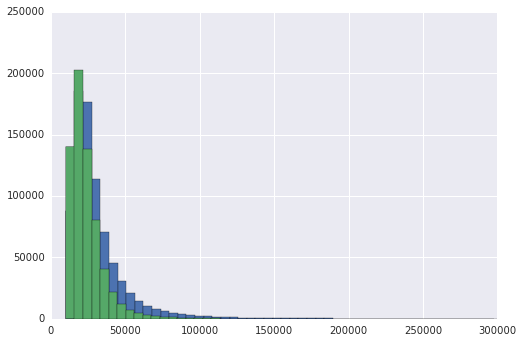

In [192]:
df_2014[df_2014.SEXE == 1 ].query("3*10**5>YSALI>10**4").YSALI.hist(bins= 50)
df_2014[df_2014.SEXE == 2 ].query("3*10**5>YSALI>10**4").YSALI.hist(bins = 50)

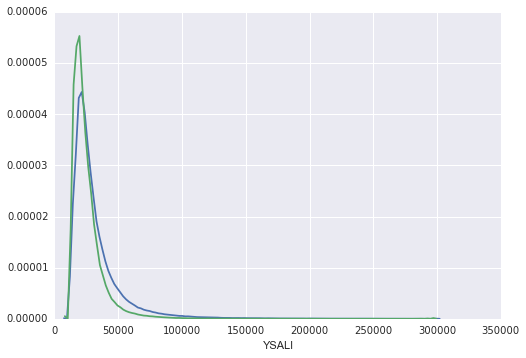

In [196]:
import seaborn as sns
sns.distplot(df_2014[df_2014.SEXE == 1 ].query("3*10**5>YSALI>10**4").YSALI, hist = False)
sns.distplot(df_2014[df_2014.SEXE == 2 ].query("3*10**5>YSALI>10**4").YSALI, hist = False)


In [194]:
%%time
working_by_sex_reg = pd.merge(reg_df, df_working_by_log, left_index=True,right_index=True, )
working_wo_2011 = working_by_sex_reg.working_wo_2011.astype("bool")
not_working_wo_2014 =  ~working_by_sex_reg.working_wo_2014.astype("bool")
working_me_2011 = working_by_sex_reg.working_me_2011.astype("bool")
not_working_me_2014 =  ~working_by_sex_reg.working_me_2014.astype("bool")
working_by_sex_reg["Wo_stopped_working"] =( working_wo_2011 & not_working_wo_2014).astype("int")
working_by_sex_reg["Wo_started_working"] =( ~working_wo_2011 & ~not_working_wo_2014).astype("int")
working_by_sex_reg["Men_stopped_working"] =( working_me_2011 & not_working_me_2014).astype("int")
working_by_sex_reg["Men_started_working"] =( ~working_me_2011 & ~not_working_me_2014).astype("int")

Wall time: 13 s


TODO : attention on perd 2000 observations, voir pourquoi

In [195]:
working_by_sex_reg.YSALI_me_2011.describe()

count     451712.000000
mean       33275.530229
std        30870.199611
min            0.000000
25%         8609.500000
50%        31116.000000
75%        46052.000000
max      1629078.000000
Name: YSALI_me_2011, dtype: float64

In [199]:
working_by_sex_reg.YSALI_wo_2014.describe()

,YSALI_wo_2014,YSALI_wo_2014
count,451701.000000,451701.000000
mean,18879.086810,18879.086810
std,20339.755562,20339.755562
min,0.000000,0.000000
25%,0.000000,0.000000
50%,17727.000000,17727.000000
75%,29925.000000,29925.000000
max,2609445.000000,2609445.000000


In [200]:
df_2011_keep.shape

(2111716, 136)

In [201]:
reg_df.shape

(497632, 320)

In [202]:

#TODO : Le working_wo c'est n'importe quoi
working_by_sex_reg[working_by_sex_reg.Wo_started_working==1][["YSALI_wo_2011","YCHOI_wo_2011","YRSTI_wo_2011", "YSALI_wo_2014", "working_wo_2011", "Age_wo"]].head()

,YSALI_wo_2011,YCHOI_wo_2011,YRSTI_wo_2011,YSALI_wo_2014,YSALI_wo_2014,working_wo_2011,Age_wo
7,11,1883,0,25574,25574,0,51
508,0,0,0,5277,5277,0,34
623,54000,0,5400,40000,40000,0,43
995,586,0,0,24115,24115,0,53
996,0,0,0,20237,20237,0,35


In [203]:
working_by_sex_reg.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 451712 entries, 3.0 to 3667298.0
Columns: 362 entries, ID_DIFF_2014 to Men_started_working
dtypes: bool(12), float64(215), int32(35), int64(73), object(27)
memory usage: 1.1+ GB


In [204]:
#%%time
#working_by_sex_reg.to_hdf("C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2015\Programme\Réaction offre de travail", "to_reg.h5")

In [205]:
s = working_by_sex_reg.columns.to_series()
working_by_sex_reg.columns = s + s.groupby(s).cumcount().astype(str).replace({'0':''})

In [206]:
%%time
working_by_sex_reg.to_hdf(u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/Réaction offre de travail/hdf/data_step_1_reaction_offre_travail.h5",
                          "fisci_fiscr_fiscrevdet")
import datetime
print datetime.datetime.now()

2018-06-07 16:13:06.872000
Wall time: 8.38 s


In [126]:
#working_by_sex_reg.Id_diff_me

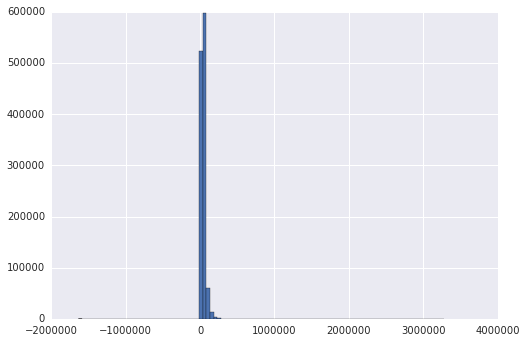

In [127]:
working_by_sex_reg.Rbg_2011.hist(bins = 100)

In [128]:
import datetime
print datetime.datetime.now()

2018-06-07 15:21:36.393000


In [129]:
reg_df_1 = reg_df[["Over_threshold", "Between_thresholds"]+cumulative_child_bool_list+thrsh_bool_list]

In [130]:
3

3

### 

Wall time: 2.75 s


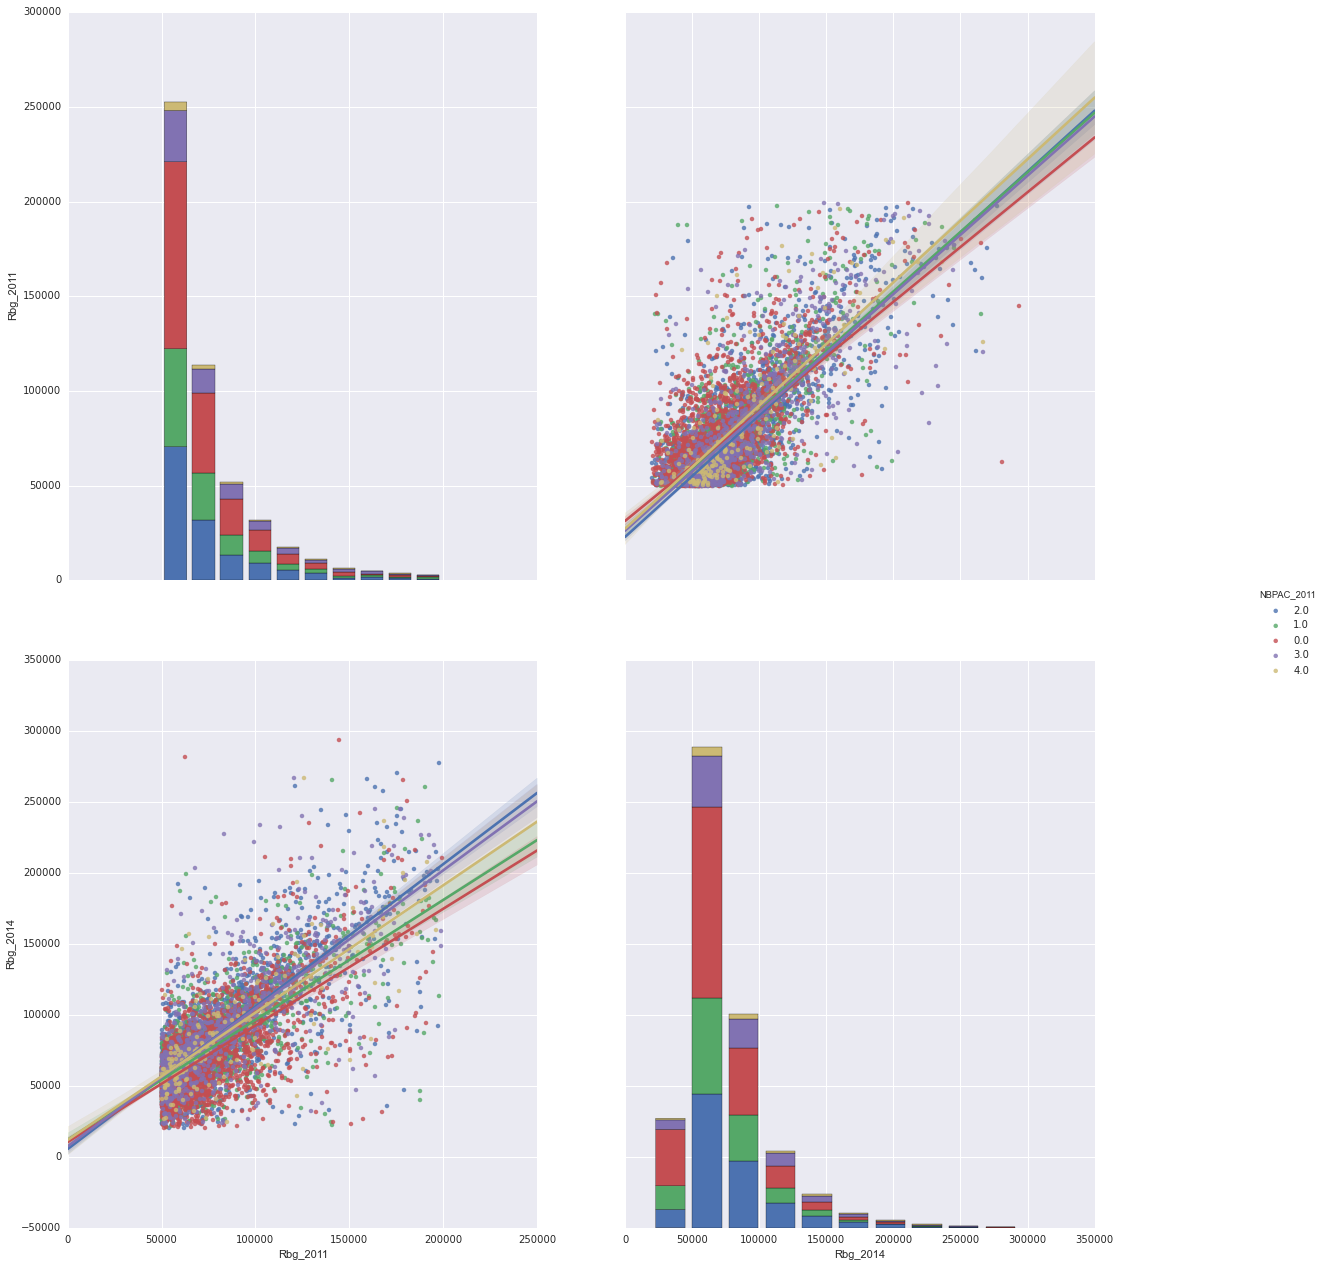

In [94]:
%%time
fig = plt.figure(figsize = (20,20))
g = sns.pairplot(reg_df.head(10000).query("0<=NBPAC_2011<5"),vars = ["Rbg_2011", "Rbg_2014"], hue ="NBPAC_2011", kind = "reg"  )
g.fig.set_size_inches(20,20)